<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [0]:
df = pd.read_csv('robbery.csv')
df.head()


,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,8/17/2016,15:03,August,Friday,2014,street,robbery and murder,riffle,43.653210,-79.381287,day
1,4676906,10-05-2016,08:55,October,Thursday,2016,residence,robbery and murder,riffle,43.785351,-79.278572,day
2,4789749,10/17/2016,15:03,October,Sunday,2016,residence,robbery and murder and murder,riffle,43.700970,-79.399261,night
3,4789765,10/17/2016,15:03,October,Sunday,2014,street,robbery and murder,knife,43.739391,-79.513222,night
4,4677901,10/15/2016,08:55,October,Sunday,2016,residence,robbery and murder and murder,firearms,43.720444,-79.551483,night


In [0]:
df.shape


(49, 12)

In [0]:
df['occ_date'] = pd.to_datetime(df['occ_date'])
df.head()


,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,2016-08-17,15:03,August,Friday,2014,street,robbery and murder,riffle,43.653210,-79.381287,day
1,4676906,2016-10-05,08:55,October,Thursday,2016,residence,robbery and murder,riffle,43.785351,-79.278572,day
2,4789749,2016-10-17,15:03,October,Sunday,2016,residence,robbery and murder and murder,riffle,43.700970,-79.399261,night
3,4789765,2016-10-17,15:03,October,Sunday,2014,street,robbery and murder,knife,43.739391,-79.513222,night
4,4677901,2016-10-15,08:55,October,Sunday,2016,residence,robbery and murder and murder,firearms,43.720444,-79.551483,night


In [0]:
df['weapons used'].value_counts()


riffle      22
knife       13
firearms     8
ironrods     6
Name: weapons used, dtype: int64

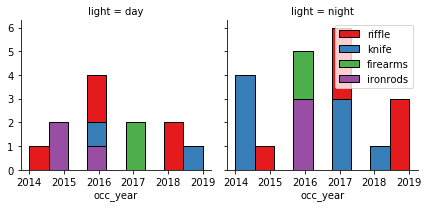

In [0]:
import seaborn as sns

bins = np.linspace(df.occ_year.min(), df.occ_year.max(), 10)
g = sns.FacetGrid(df, col="light", hue="weapons used", palette="Set1", col_wrap=2)
g.map(plt.hist, 'occ_year', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


In [0]:
df.groupby(['location'])['weapons used'].value_counts(normalize=True)

location   weapons used
apartment  knife           0.384615
           riffle          0.384615
           firearms        0.153846
           ironrods        0.076923
residence  riffle          0.450000
           firearms        0.200000
           knife           0.200000
           ironrods        0.150000
street     riffle          0.500000
           knife           0.250000
           firearms        0.125000
           ironrods        0.125000
Name: weapons used, dtype: float64

In [0]:
df['light'].replace(to_replace=['day','night'], value=[0,1],inplace=True)
df.head()

,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,2016-08-17,15:03,August,Friday,2014,street,robbery and murder,riffle,43.653210,-79.381287,0
1,4676906,2016-10-05,08:55,October,Thursday,2016,residence,robbery and murder,riffle,43.785351,-79.278572,0
2,4789749,2016-10-17,15:03,October,Sunday,2016,residence,robbery and murder and murder,riffle,43.700970,-79.399261,1
3,4789765,2016-10-17,15:03,October,Sunday,2014,street,robbery and murder,knife,43.739391,-79.513222,1
4,4677901,2016-10-15,08:55,October,Sunday,2016,residence,robbery and murder and murder,firearms,43.720444,-79.551483,1


In [0]:
df[['occ_year','location','occ_week','light']].head()

,occ_year,location,occ_week,light
0,2014,street,Friday,0
1,2016,residence,Thursday,0
2,2016,residence,Sunday,1
3,2014,street,Sunday,1
4,2016,residence,Sunday,1


In [0]:
Feature = df[['occ_year','light']]
Feature = pd.concat([Feature,pd.get_dummies(df['location'])], axis=1)
Feature.head()

,occ_year,light,apartment,residence,street
0,2014,0,0,0,1
1,2016,0,0,1,0
2,2016,1,0,1,0
3,2014,1,0,0,1
4,2016,1,0,1,0


In [0]:
X = Feature
X[0:5]


,occ_year,light,apartment,residence,street
0,2014,0,0,0,1
1,2016,0,0,1,0
2,2016,1,0,1,0
3,2014,1,0,0,1
4,2016,1,0,1,0


In [0]:
y = pd.get_dummies(df['weapons used'])['riffle'].values
y[0:5]


array([1, 1, 1, 0, 0], dtype=uint8)

In [0]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-1.77237252, -1.25656172, -0.60092521, -0.8304548 ,  1.43614066],
       [-0.31277162, -1.25656172, -0.60092521,  1.20415946, -0.69631062],
       [-0.31277162,  0.79582243, -0.60092521,  1.20415946, -0.69631062],
       [-1.77237252,  0.79582243, -0.60092521, -0.8304548 ,  1.43614066],
       [-0.31277162,  0.79582243, -0.60092521,  1.20415946, -0.69631062]])

In [0]:
from sklearn.tree import DecisionTreeClassifier


In [0]:
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy


0.5

In [0]:
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred=svmmodel.predict(X_test)
y_pred


array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [0]:
metrics.accuracy_score(y_test,y_pred)

0.4